In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
def Cluster(vectors, means, K):
    clusters = [[] for _ in range(K)]
    for v in vectors:
        min_ind = 0
        min_dis = np.inf
        for i,m in enumerate(means):
            dis = np.linalg.norm(v-m)
            if(dis < min_dis):
                min_ind = i
                min_dis = dis
        clusters[min_ind].append(v)
               
    return clusters

def UpdateMeans(clusters):
    means = []
    for cluster in clusters:
        means.append(np.mean(cluster, axis=0))
    return means

def plot_kmeans(vectors, cluster_means):
    pca = PCA(n_components=2)
    reduced_pts = pca.fit_transform(vectors).transpose()
    reduced_means = pca.fit_transform(cluster_means).transpose()
    vor = Voronoi(reduced_means.transpose())
    plt.figure(figsize=(10,10))
    fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)
    plt.scatter(reduced_pts[0], reduced_pts[1], color='red')
    plt.show()

In [ ]:
def KMeans(vectors, K):
    n = len(vectors)
    vec_shape = vectors[0].shape
    cluster_means = list(np.array(vectors)[np.random.choice(n, K, replace=False)]) ##FORGI INITIALIZATION
    while(True):
        clusters = Cluster(vectors, cluster_means, K)
        cluster_means = UpdateMeans(clusters)
        if(Cluster(vectors, cluster_means, K) == clusters):
          break
    return clusters, cluster_means


In [ ]:
X1 = -2 * np.random.rand(100,3)
X2 = 1 + 2 * np.random.rand(50,3)
X3 = 4 - 2 * np.random.rand(50,3)
X4 = 6 + 2 * np.random.rand(50,3)
X5 = 8 - 2 * np.random.rand(50,3)
X6 = 10 + 2 * np.random.rand(50,3)

In [ ]:
vectors = list(X1)+list(X2)+list(X3)+list(X4)+list(X5)+list(X6)

In [ ]:
len(vectors)

350

In [ ]:
clusters, cluster_means = KMeans(vectors, 6)

<Figure size 720x720 with 0 Axes>

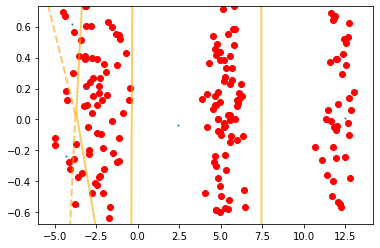

In [ ]:
plot_kmeans(vectors, cluster_means)